# Monster Classifier

In [1]:
from os import listdir
from os.path import isfile, join

spiderDir = 'C:\\Users\\peter\\Google Drive\\local\\sw\\ANewKindOfMonster\\experiments\\1-monster-space\\spider-pages-depth-1'
spider_files = [f for f in listdir(spiderDir) if isfile(join(spiderDir, f))]
print (len(spider_files), ' files read')

7068  files read


## Vocabulary analysis

In [2]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

### All word frequencies (except stopwords)

In [4]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords 

freqs = dict()
stop_words = set(stopwords.words('english')) 

for file in spider_files:
    filename = spiderDir + "\\" + file
    
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
    
    words = word_tokenize(content)
    
    words = [w.lower() for w in words]
    filtered_words = [w for w in words if not w in stop_words]
    
    for word in filtered_words:
        if word in freqs:
            freqs[word] += 1
        else:
            freqs[word] = 1

freqs = sortFreqDict(freqs)
freqs

[(1915231, ','),
 (1912845, '.'),
 (789711, ')'),
 (788925, '('),
 (520221, ']'),
 (520122, '['),
 (382323, '``'),
 (379821, ':'),
 (356781, "''"),
 (301562, '^'),
 (189130, "'s"),
 (131456, 'retrieved'),
 (117060, ';'),
 (96494, 'edit'),
 (74073, 'new'),
 (71687, 'film'),
 (70790, 'original'),
 (62695, 'archived'),
 (62124, 'p.'),
 (59745, 'also'),
 (52739, "'"),
 (50732, '1'),
 (50086, 'isbn'),
 (49751, '2'),
 (49630, '–'),
 (48095, 'b'),
 (47627, '&'),
 (46476, 'may'),
 (45224, 'one'),
 (42839, 'help'),
 (40571, '3'),
 (39967, 'first'),
 (37351, 'world'),
 (35949, 'target'),
 (35845, '4'),
 (35063, 'error'),
 (30915, '2016'),
 (30705, '2017'),
 (30437, 'history'),
 (30151, '5'),
 (29737, 'university'),
 (29557, '2014'),
 (29513, '2018'),
 (29485, 'pp'),
 (29463, '2012'),
 (29457, 'time'),
 (29453, 'march'),
 (29311, '2015'),
 (29264, 'press'),
 (29011, 'october'),
 (28907, '2013'),
 (28748, '2011'),
 (28727, '2019'),
 (28610, 'series'),
 (28427, 'films'),
 (28251, 'january'),
 (2786

### Frequencies of non-glove words

In [5]:
import numpy as np

def loadGloveModel(File):
    print("Loading Glove Model")
    f = open(File,'r', encoding='utf-8')
    gloveModel = {}
    for line in f:
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

In [6]:
glove = loadGloveModel('c:\pfd\glove.6B.100d.txt')

Loading Glove Model
400000  words loaded!


In [7]:
non_glove_freqs = dict()

for file in spider_files:
    filename = spiderDir + "\\" + file
    
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
    
    words = word_tokenize(content)
    
    words = [w.lower() for w in words]
    filtered_words = [w for w in words if not w in stop_words]
    
    for word in filtered_words:
        if not word in glove:
            if word in non_glove_freqs:
                non_glove_freqs[word] += 1
            else:
                non_glove_freqs[word] = 1

non_glove_freqs = sortFreqDict(non_glove_freqs)
non_glove_freqs

[(5529, 's2cid'),
 (5506, 'harvnb'),
 (5415, 'maint'),
 (5029, '•'),
 (3496, 'lccn'),
 (3472, '..'),
 (3381, 'sfnp'),
 (3097, 'sh98004527'),
 (3097, 'cb13337425v'),
 (3097, '99613125'),
 (3097, '4430243-5'),
 (2379, "'the"),
 (2111, 'wikidata'),
 (2021, "all'italiana"),
 (1594, '°c'),
 (1552, '✓'),
 (1551, 'sfnm'),
 (1440, 'sword-and-sandal'),
 (1388, '°f'),
 (1301, 'sitelink'),
 (1150, 'harvp'),
 (1085, 'wikiquote'),
 (1028, '§'),
 (994, '0362-4331'),
 (982, '→'),
 (855, 'poliziotteschi'),
 (838, 'auteurism'),
 (827, 'ryfle'),
 (824, 'sceneggiata'),
 (810, 'bromantic'),
 (799, 'calligrafismo'),
 (785, 'mumblegore'),
 (785, '\\displaystyle'),
 (729, 'fantasy\u200e'),
 (720, 'isekai'),
 (716, 'wikiproject'),
 (710, '\u200b'),
 (673, 'covid-19'),
 (672, "'star"),
 (663, 'monsterverse'),
 (658, '×'),
 (555, 'netherrealm'),
 (542, 'draconomicon'),
 (527, '−'),
 (507, 's.v'),
 (502, 'theoi'),
 (490, 'rumberas'),
 (485, '|journal='),
 (482, "'godzilla"),
 (473, '1–2'),
 (463, 'ravnica'),
 (4

## Classifier

### Frequent-word histogram features

In [8]:
train_pos_dir='C:\\Users\\peter\\Google Drive\\local\\sw\\ANewKindOfMonster\\experiments\\1-monster-space\\labeled\\train\\positive'
train_neg_dir='C:\\Users\\peter\\Google Drive\\local\\sw\\ANewKindOfMonster\\experiments\\1-monster-space\\labeled\\train\\negative'
test_pos_dir='C:\\Users\\peter\\Google Drive\\local\\sw\\ANewKindOfMonster\\experiments\\1-monster-space\\labeled\\test\\positive'
test_neg_dir='C:\\Users\\peter\\Google Drive\\local\\sw\\ANewKindOfMonster\\experiments\\1-monster-space\\labeled\\test\\negative'

# Use this many words in the histogram
vector_size = 1000

In [9]:
pos_train_files = [f for f in listdir(train_pos_dir) if isfile(join(train_pos_dir, f))]
neg_train_files = [f for f in listdir(train_neg_dir) if isfile(join(train_neg_dir, f))]

train_freqs = dict()
stop_words = set(stopwords.words('english')) 

pos_train_files = [join(train_pos_dir, f) for f in pos_train_files ]
neg_train_files = [join(train_neg_dir, f) for f in neg_train_files ]

train_files = pos_train_files + neg_train_files;

for filename in train_files:
    
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
    
    words = word_tokenize(content)
    
    lc_words = [w.lower() for w in words]
    filtered_words = [w for w in lc_words if not w in stop_words]
    
    for word in filtered_words:
        if word in train_freqs:
            train_freqs[word] += 1
        else:
            train_freqs[word] = 1

train_freqs = sortFreqDict(train_freqs)

In [10]:
top_words = [w[1] for w in train_freqs][:vector_size]
top_words

[',',
 '.',
 ')',
 '(',
 ']',
 '[',
 ':',
 '``',
 "''",
 '^',
 ';',
 "'s",
 'monstrous',
 '–',
 'retrieved',
 'compendium',
 '&',
 'edit',
 'appendix',
 'dragon',
 'p.',
 'new',
 'isbn',
 '1993',
 'manual',
 'original',
 'monster',
 'one',
 'archived',
 'also',
 '1',
 'b',
 '1991',
 'may',
 'help',
 'creature',
 '1994',
 'giant',
 'target',
 'volume',
 'error',
 '%',
 'world',
 '2',
 'london',
 'dragons',
 '3',
 'two',
 'film',
 'monsters',
 "'",
 '2008',
 'first',
 '2011',
 'game',
 '2020',
 '4',
 'april',
 'united',
 '1995',
 'history',
 'january',
 '2010',
 'sfn',
 'american',
 'set',
 'pp',
 '2015',
 'states',
 '2013',
 'human',
 '2007',
 '2014',
 'march',
 'annual',
 '2017',
 'war',
 'ii',
 '2012',
 'july',
 'press',
 'dungeons',
 'years',
 '2003',
 'species',
 'm.',
 'city',
 'university',
 '6',
 '10',
 '1996',
 '2018',
 '2019',
 'used',
 'sea',
 '2016',
 '1989',
 'national',
 '7',
 'florida',
 'august',
 '2009',
 '8',
 'godzilla',
 'time',
 '5',
 'june',
 'c',
 'black',
 'februa

In [11]:
def wordHistogram(text, feature_word_list):
    words = word_tokenize(text)
    lc_words = [w.lower() for w in words]
    
    histogram = []
    for fw in feature_word_list:
        histogram.append(lc_words.count(fw))
    return histogram        

In [12]:
train_data = []
labels = []

for filename in pos_train_files:
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
        
    histo=wordHistogram(content, top_words)
    train_data.append(histo)
    labels.append('monster')

for filename in neg_train_files:
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
        
    histo=wordHistogram(content, top_words)
    train_data.append(histo)
    labels.append('non-monster')


In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

##classifier = svm.SVC(gamma=0.001, C=100)
#classifier = svm.SVC(gamma=0.01, C=10)
#classifier.fit(train_data,labels)

#F1=.82
std_clf = make_pipeline(StandardScaler(), GaussianNB())

#std_clf = make_pipeline(StandardScaler(),svm.SVC(gamma=0.01, C=10))
std_clf.fit(train_data, labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

## Performance Check

In [14]:
pos_test_files = [f for f in listdir(test_pos_dir) if isfile(join(test_pos_dir, f))]
neg_test_files = [f for f in listdir(test_neg_dir) if isfile(join(test_neg_dir, f))]

pos_test_files = [(join(test_pos_dir, f)) for f in pos_test_files]
neg_test_files = [(join(test_neg_dir, f)) for f in neg_test_files]

tp = 0
fn = 0
for filename in pos_test_files:
    print(filename)
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
        
    histo=wordHistogram(content, top_words)
    features = []
    features.append(histo)
    
    #result = classifier.predict(features)
    result = std_clf.predict(features)
    if (result == 'monster'):
        tp += 1
    if (result == 'non-monster'):
        fn += 1
    print(result)

fp = 0
tn = 0
for filename in neg_test_files:
    print(filename)
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
        
    histo=wordHistogram(content, top_words)
    features = []
    features.append(histo)
    
    #result = classifier.predict(features)
    result = std_clf.predict(features)
    if (result == 'monster'):
        fp += 1
    if (result == 'non-monster'):
        tn += 1
    print(result)

    
print('tp:', tp)
print('tn:', tn)
print('fp:', fp)
print('fn:', fn)

f1 = tp / (tp + 0.5*(fp+fn))
print('f1: ', f1)
print('precision: ', tp/(tp+fp))
print('recall: ', tp/(tp+fn))

C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\labeled\test\positive\Alien_(creature_in_Alien_franchise).txt
['monster']
C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\labeled\test\positive\Bigfoot.txt
['non-monster']
C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\labeled\test\positive\Chimera_(mythology).txt
['monster']
C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\labeled\test\positive\Cthulhu.txt
['monster']
C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\labeled\test\positive\Doppelganger_(Dungeons_%26_Dragons).txt
['monster']
C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\labeled\test\positive\Elemental_(Dungeons_%26_Dragons).txt
['monster']
C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\labeled\test\positive\Ghost.txt
['monster']
C:

### Performance check using sklearn's confusion matrix feature

Confusion matrix, without normalization
[[14  2]
 [ 4 13]]
Normalized confusion matrix
[[0.875      0.125     ]
 [0.23529412 0.76470588]]


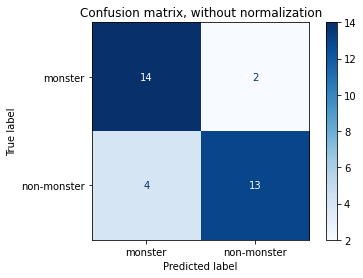

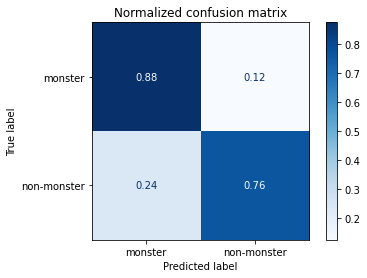

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

test_data = []
test_labels = []

for filename in pos_test_files:
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
        
    histo=wordHistogram(content, top_words)
    test_data.append(histo)
    test_labels.append('monster')

for filename in neg_test_files:
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
        
    histo=wordHistogram(content, top_words)
    test_data.append(histo)
    test_labels.append('non-monster')

class_names = ['monster', 'non-monster']
    
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(std_clf, test_data, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Use the Monster classifier to find new monster pages in the spider output

In [17]:

abs_spider_files = [(join(spiderDir, f)) for f in spider_files]

monster_pages = []

for filename in abs_spider_files:
    with open(filename, 'r', encoding='utf-8') as text:
        content = text.read()
        
    histo=wordHistogram(content, top_words)
    features = []
    features.append(histo)
    
    result = std_clf.predict(features)
    if (result == 'monster'):
        monster_pages.append(filename)
        print(result, ' --- ', filename)

print('found ', len(monster_pages), ' monster pages')

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\-SLASH-Film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\-zilla.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\10 Cloverfield Lane.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\1001 Movies You Must See Before You Die.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\101 Names of God.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\12 Monkeys.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\1782 Central At

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Actuality film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\AD.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Adam (Bible).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Adam Wingard.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Adam.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Additions to Daniel.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Adephagia.txt
['monster']  ---  C:\Users\peter\Google

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Albert Ostman.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Albert Whitlock.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Alcyone (Pleiad).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Alecto.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Alejandro Jodorowsky.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Aletheia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Alexandre Jacques François Brière de B

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Aliens vs. Predator (2010 video game).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Aliens vs. Predator-COLON- Requiem (soundtrack).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Aliens vs. Predator-COLON- Requiem (video game).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Aliens vs. Predator-COLON- Requiem.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Aliens-COLON- A Comic Book Adventure.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Aliens-COLON- Colonial Marines Technical M

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Anagram.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Anaideia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ananke.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Anapos.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Anat.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ancient Egyptian concept of the soul.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ancient Greek religious beliefs.txt
['monster']  

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Apotropaic magic.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Appendix Vergiliana.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Arae.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Arcana Studio.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Archaeological Museum of Corfu.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Archangel.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ares.txt
['monster']  ---

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Atlas (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Atragon.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Atropos.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Attack of the 50 Foot Woman.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Attack of the Crab Monsters.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Attack of the Giant Leeches.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Atti

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Bar (heraldry).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Baragon.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Baraka (Mortal Kombat).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Barbarian (Dungeons & Dragons).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Bard (Dungeons & Dragons).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Barney's Great Adventure.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-de

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Beowulf, the Monsters and the Critics.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Beowulf-COLON- A New Verse Translation.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Beowulf-COLON- The Monsters and the Critics.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Bergsrå.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Beringia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Berlin School (filmmaking).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experi

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Bloodborne.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Bloody Disgusting.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Blu-ray Disc.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Blu-ray.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Blue Ben.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Blue men of the Minch.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Blue Öyster Cult.txt
['monster']  ---  C:

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Burgher arms.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Burial custom.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Burton Raffel.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Bômô.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Caanthus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Cadmus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Caduceus.txt
['monster']  ---  C:\Users\peter\Google Drive\l

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-1956 films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-1958 films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-1964 films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-1966 films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-1967 films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-1968 films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-m

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-CS1 maint-COLON- unfit URL.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-CS1 maint-COLON- uses authors parameter.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-Cthulhu Mythos writers.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-Fantasy creatures.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-Fantasy.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Category-COLON-Fictional ghosts.txt
['monster']  ---  C:\

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Catholic Church.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Caul fat.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Caura River (Venezuela).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Caveman (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\CD.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ceasg.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Cebren.txt
['monster']  ---  C:\Users\peter\Googl

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Christiaan Lindemans.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Christian demonology.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Christian Nyby.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Christine (1983 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Christine (soundtrack).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Christopher Paolini.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Cocytus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Codex Marcianus CCXXVIII (406).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Cody Carpenter.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Coeus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Cold Ground.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Cold reading.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Collage film.txt
['monster']  ---  C:

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Count Dracula.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Counter-Earth.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\COVID-19 pandemic.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Cracked.com.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\CraveOnline.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Crawford Award.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Creation (unfinished film).txt
['mons

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dagon (short story).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dagon.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Daiei Film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Daigo Fukuryū Maru.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Daikaiju.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Daily Mail.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Daimajin (1966 film).txt
['monster']  ---  C:\

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dean Devlin.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dear God No!.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Death (Discworld).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Death (personification).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Debunker.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Declan O'Brien.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Deep Core (film).txt
['monster'

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dione (Titaness).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Director's cut.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dirk W. Mosig.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Disa.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Disaster film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Disco Lies.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Discworld (world).txt
['monster']  ---  C:\Use

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dragon King.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dragon of Mordiford.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dragon Quest.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dragon's Eye (symbol).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dragon.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dragonlance.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dragonology.txt
['monster']  ---  C:

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\DVDTalk.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dwarf (Dungeons & Dragons).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dwarf (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dwayne Hicks.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dwellers (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dybbuk.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Dying Earth genre.txt
['monster']

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eilistraee.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eirene (goddess).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eiresione.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eisheth Zenunim.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eisheth.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ekecheiria.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\El Diablo (1990 film).txt
['monster']  ---  C:\Us

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eric Pearson.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eridanos (river of Hades).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Erik Pontoppidan.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Erinyes.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eris (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Erlking.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ernest B. Schoedsack.txt
['monste

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Eyes of Laura Mars.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\F-104 Starfighter.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\F. Wesley Schneider.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\F.y.e..txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Fable III.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Fable.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Fabulae.txt
['monster']  ---  C:\Users\pet

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Felicity (TV series).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Female buddy film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Fengdu Ghost City.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Feral child.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Fereydun.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Fess.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Festival Internacional de Cinema de Cat

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Four Seas.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Fran Walsh.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Francis Barton Gummere.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Francis James Child.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Frank Belknap Long.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Frank Darabont.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Frank Edwards (writer an

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gamera vs. Zigra.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gamera, the Giant Monster.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gamera-COLON- Guardian of the Universe.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gamera-COLON- Super Monster.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gamera.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gamerabaena.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-d

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ghidorah.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ghillie Dhu.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ghillie suit.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ghost (1990 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ghost (disambiguation).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ghost Adventures.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ghost Corps.txt
['monster']  -

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Giant.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Giant_(Dungeons_%26_Dragons).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gigan.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gigantic octopus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gigelorum.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gilgamesh epic.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Girls Talk Boys.txt
['monster']  ---  C

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Godzilla, King of the Monsters!.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Godzilla, Mothra and King Ghidorah-COLON- Giant Monsters All-Out Attack.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Godzilla-COLON- City on the Edge of Battle.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Godzilla-COLON- Destroy All Monsters Melee.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Godzilla-COLON- Final Wars.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Godzilla-COLON- King of the Mon

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Grateful dead (folklore).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gravity (2013 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gravity Falls (season 2).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gravity Falls.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Gray_ooze.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Great Glen Fault.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Great Old O

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Halloween (1978 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Halloween (2018 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Halloween (soundtrack).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Halloween Horror Nights.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Halloween II (1981 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Halloween II (soundtrack).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\s

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Heimatfilm.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Heinrich Kramer.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Heist film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Helen Keller vs. Nightwolves.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Helhest.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Helice (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Heliodorus of Emesa.txt
['mo

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Holiday horror.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hollow Earth.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hollow World.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hollywood Walk of Fame.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hollywood.com.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Holy Ghost.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Homados.txt
['monster']  ---  C:\

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hyperlink cinema.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hypnagogia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hypnos (short story).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hypnos.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hysminai.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Hôtel particulier.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\I Timothy.txt
['monster']  ---  C:\User

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\International Commission on Zoological Nomenclature.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\International Fantasy Award.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\International Film Music Critics Association.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Internet Archive.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Internet Speculative Fiction Database.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Interstellar (film).txt
['monster']  ---  C:\Users\peter\Google Driv

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Jack Kirby.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Jack the Giant Slayer.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Jacko hoax.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Jaculus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Jade (Mortal Kombat).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Jakandor.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Jamasp Namag.txt
['monster']  ---  C:\Us

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\John Carpenter.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\John D. Niles.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\John Day (Old Testament scholar).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\John Eric Holmes.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\John Ferriar.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\John Gatins.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\John Glasby.txt
['

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kakia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kali.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kamacuras.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kameiros.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kamen Rider Den-O & Kiva-COLON- Climax Deka.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kammerspielfilm.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kamogawa Sea World.txt
['monster

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\King Kong (1976).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\King Kong (2005 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\King Kong (2005 video game).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\King Kong (2005).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\King Kong (2013 musical).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\King Kong (Atari 2600).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-page

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kotobuki (folklore).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Krahang.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kraken (disambiguation).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kraken (Marvel Comics).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kraken in popular culture.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Kraken.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Krakus.txt
['m

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lawrence Person.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lawrence Turman.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\LCCN (identifier).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lee Tockar.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lee Van Cleef.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Legal drama.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Legal thriller.txt
['monster']  ---

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Alien vs. Predator (franchise) novels.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Alien, Predator, and Alien vs. Predator games.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of alternative Dungeons & Dragons classes.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of American films of 1958.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of apocalyptic films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of artistic depictions of Grendel.txt
[

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Ghostbusters video games.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Godzilla games.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Godzilla Island episodes.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Great Old Ones.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Greyhawk characters.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of Greyhawk deities.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experi

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of vampire films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\List of zombie films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lists of action films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lists of adventure films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lists of animated feature films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lists of avant-garde films.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Louvre.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Love and Monsters (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Love in the Time of Monsters.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Love magic.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lovecraft Country (TV series).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Lovecraft-COLON- A Biography.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Make a Jazz Noise Here.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Making-of.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Malakut.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Malay ghost myths.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Man-of-war.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Manananggal.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Manda (kaiju).txt
['monster']  ---  C:\U

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mecha anime and manga.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mecha.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mechagodzilla.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mechani-Kong.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Medea (play).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Medea.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Medici knot.txt
['monster']  ---  C:\Users\peter

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Michael Jordan.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Michael Ritchie (film director).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Michael Stahl-David.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Michael Wolgemut.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Michelin Man.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Microsoft Windows.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Midden.

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Moirai.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mojang Studios.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mokele-mbembe.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Moldmaker.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Momo the Monster.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Momus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mon (emblem).txt
['monster']  ---  C:\Users\peter\Goo

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mortal Kombat II.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mortal Kombat Kard Game.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mortal Kombat Legends-COLON- Scorpion's Revenge.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mortal Kombat Mythologies-COLON- Sub-Zero.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mortal Kombat X.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mortal Kombat-COLON- Annihilation.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKind

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Myling.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Myspace.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mystara.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mysterion Rises.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mystery film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mystery Science Theater 3000.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Mystra (Forgotten Realms).txt
['monster']

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nessie.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nete (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Netflix.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\NetHack.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Neville Page.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\New Alcatraz.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\New French Extremity.txt
['monster']  ---  C:\Users\pete

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nyarlathotep.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nymph.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nymphai Hyperboreioi.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nyx.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nægling.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Níðhöggr.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Nüwa.txt
['monster']  ---  C:\Users\peter\Google Drive\local\

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Orpheus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Orphism (religion).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Orseis.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Osteology.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ostern.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Othello.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Otia Imperialia.txt
['monster']  ---  C:\Users\peter\Google Dri

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Patterson-Gimlin film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Patterson–Gimlin film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Paul Frees.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Paul W. S. Anderson.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Pausanias (geographer).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Pay-per-view.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Pech (mytho

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Phoenicia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Phoenix (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Phonograph record.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Phonoi.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Phorcys.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Phosphorus (morning star).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Phraya Anuman Rajadhon.txt
['mons

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Poena.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Poetic Edda.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Poetic realism.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Poetry and the Gods.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Poetry film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Polaris (short story).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Polemos.txt
['monster']  ---  C:\Us

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Prison film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Private Officer of Arms.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Pro-Life (Masters of Horror).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Procession of the dead.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Proioxis.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Prometheus (soundtrack).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\P

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Quan Chi.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Quartering (heraldry).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Quasimodo.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Queen (bee).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Queen Kong.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Queen of the Damned.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Queen of the Spiders.txt
['monster']  

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Religious tradition.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Remodernist film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Renaissance magic.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Repentance.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Reportedly haunted locations in Scotland.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Reportedly haunted locations in the District of Columbia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experim

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\RoboCop.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Robot Chicken (season 4).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Robot Chicken.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Roc (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Rock Monster.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Rock_Monster.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Roc_(Dungeons_%26_Dragons).txt
['

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Sacrifice.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Saga.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Sagami Province.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Saikai Bridge.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Saikai City.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Sailor cap.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Sailors' superstitions.txt
['monster']  ---  C:\Users\

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Scooby-Doo.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Scoop (term).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Scorpion (Mortal Kombat).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Scott Glenn.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Scott McNeil.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Scott Terra.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Scottish folklore.txt
['monster']  -

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Shapeshifter.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Shapeshifting.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Sharktopus.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Sheeva.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Shenlong.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Shennong.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Sheol.txt
['monster']  ---  C:\Users\peter\Google Drive\loc

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Skull.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Skywalker Sound.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Slaad.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Slant Magazine.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Slasher film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Slaughterhouse-Five (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Slave Labor Graphics.txt
['monster']  -

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Spartoi.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Special effect.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Special make-up effects.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Species description.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Spectre_(Dungeons_%26_Dragons).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Spectrophilia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Spelljamme

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Steven Pressfield.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Steven S. DeKnight.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Steven Schend.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Stheno.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Stihi.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Stilbe.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Stilbon (mythology).txt
['monster']  ---  C:\Users\

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Supernatural beings in Slavic religion.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Supernatural creature.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Supernatural fiction.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Supernatural Horror in Literature.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Superstition.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Surf film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spid

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ted Cassidy.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Teju Jagua.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Tekken-COLON- The Motion Picture.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Telchines.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Telefoni Bianchi.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Telesphorus (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Telesto (mythol

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Template-COLON-D&D topics.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Template-COLON-Declan O'Brien.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Template-COLON-Dragons.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Template-COLON-Ellory Elkayem.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Template-COLON-Exploitation film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Template-COLON-Fantasy fiction.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonste

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Tetsuro Yoshida.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Tetta Sugimoto.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Teumessian fox.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Thalassa (mythology).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Thalassa.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Thalattosuchia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Thalia (Grace).txt
['monster'] 

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Dinosaur Project.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Discovery of Guiana.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Disney Channel.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Doom That Came to Sarnath.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Dooms Chapel Horror.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Dragon (Beowulf).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spid

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Jungle Book (2016 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Keep on the Borderlands.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The King Kong Show.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Kraken (poem).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Kraken Wakes.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Land Before Time II-COLON- The Great Valley Adventure.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\exp

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Nameless City.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Nautical Magazine.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Nephilim (album).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The New York Times.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The News Tribune.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Night Watchmen.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Ot

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Thing from Another World.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Thing in the Moonlight.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Thing on the Doorstep.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Things (short story).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Throwaways (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\The Tomb (short story).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monst

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Thriller film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Thrillist.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Through the Gates of the Silver Key.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Through the Looking-Glass.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Tiamat (Dungeons & Dragons).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Tiamat.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\T

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Transformers (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Transformers-COLON- The Last Knight.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Transgressive art.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Translating Beowulf.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Trapdoor spider.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Travel documentary.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-d

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ultimate Mortal Kombat 3.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Ultraman (1966 TV series).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Unclean spirit.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Undead.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Undercovers (TV series).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Underdark.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Underground fil

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Vietnamese dragon.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Vigilante film.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Village of the Damned (1995 film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Village of the Damned (soundtrack).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Vincent Canby.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Violet Hunt.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-de

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Western culture.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Weta Digital.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\What the Moon Brings.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\What We Do in the Shadows.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\When Dinosaurs Ruled the Earth.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\White dragon.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Wh

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Wulfings.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Wuxia.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Wyvern.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Wyvern_(Dungeons_%26_Dragons).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\X-Men (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\X2 (film).txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Xbox (console).txt
['monster']  ---  C:\Users\p

['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Zahhak.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Zarkorr! The Invader.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Zatoichi and the Fugitives.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Zatoichi Meets the One-Armed Swordsman.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Zatoichi on the Road.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider-pages-depth-1\Zatoichi's Cane Sword.txt
['monster']  ---  C:\Users\peter\Google Drive\local\sw\ANewKindOfMonster\experiments\1-monster-space\spider